In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML # animation in jupyter

import sys
sys.path.append('../src')
from Model import MindReader
from InspectWeights import InspectWeights
from AnimatedScatter import AnimatedScatter

# Create dummy-data

In [3]:
def generate_data():
    size = (128,2)
    N = size[0]
    first_kvadrant = np.random.normal(loc=(1,1), scale=.1, size=size)
    second_kvadrant = np.random.normal(loc=(-1,1), scale=.1, size=size)
    third_kvadrant = np.random.normal(loc=(-1,-1), scale=.1, size=size)
    fourth_kvadrant = np.random.normal(loc=(1,-1), scale=.1, size=size)
    data = np.concatenate([first_kvadrant,second_kvadrant,third_kvadrant,fourth_kvadrant])
    
    labels=np.concatenate([np.zeros(N),np.ones(N),np.ones(N)*2,np.ones(N)*3])
    return data,labels

In [4]:
data,labels = generate_data()

# Inspect / plot data

<IPython.core.display.Javascript object>


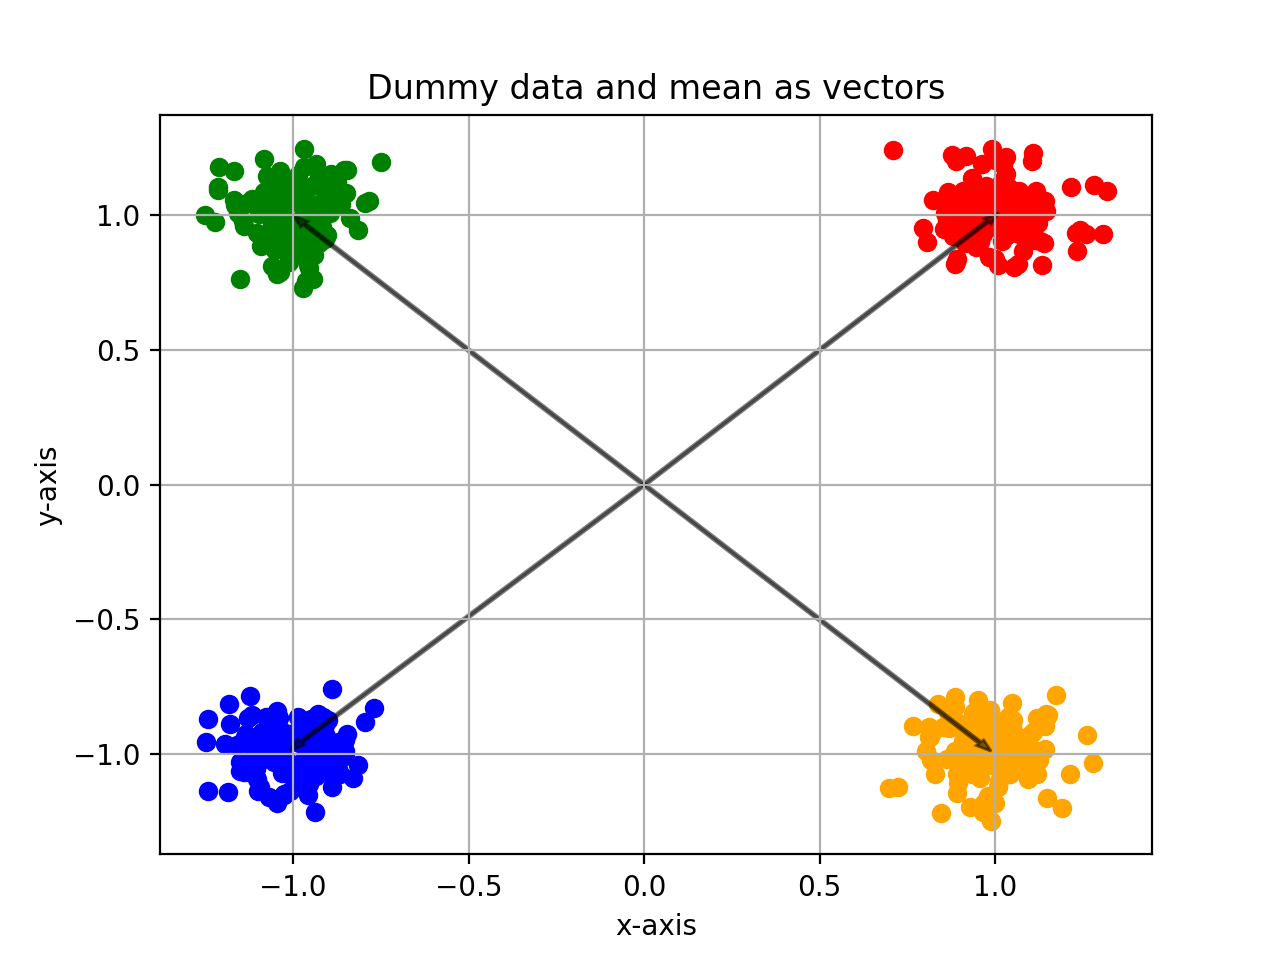

In [5]:
plt.close()
fig, ax = plt.subplots(1)#, sharex='col', sharey='row', gridspec_kw={'wspace': 0})

colors = ['red','green','blue','orange']
means = np.mean(np.reshape(data,(4,int(data.shape[0]/4),data.shape[-1])),axis=1)
cluster_N = int(data.shape[0] / 4)
for color,mean,i in zip(colors,means,range(len(colors))):
    ax.scatter(data[i*cluster_N:(i+1)*cluster_N,0],data[i*cluster_N:(i+1)*cluster_N,1],color=color)
    ax.arrow(0,0,mean[0],mean[1],length_includes_head=True,width=0.01,color=(0,0,0,0.5))
plt.title('Dummy data and mean as vectors')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
ax.grid('on')

# Initialise DL-model

In [6]:
num_categories = 4 # four data clusters
model = MindReader(num_categories)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  # Optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss func
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()], # Metrics to monitor
)

# Build (by specifying input_shape) and summarize model
mb_size = 32
input_shape = [mb_size,data.shape[-1]]
model.build(input_shape)
model.summary()

Model: "mind_reader"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  8         
_________________________________________________________________
softmax (Softmax)            multiple                  0         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


# Train model and store weight history

In [7]:
IW = InspectWeights()
model.fit(x=data,y=labels,batch_size=32,epochs=300,validation_split=0.1,shuffle=True,callbacks=[IW])

Epoch 1/300
15/15 [==============================] - 1s 42ms/step - loss: 1.6851 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 1.6282 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 1.6457 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 1.6067 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 1.6066 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 1.5828 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 1.5948 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 1.5604 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/300
15/15 [==============================] - 0s 3ms/step - loss: 1.5703 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 1.5379 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/300
15/15 [==============================] - 0s 3ms/step

15/15 [==============================] - 0s 3ms/step - loss: 0.7184 - sparse_categorical_accuracy: 0.8301 - val_loss: 0.8074 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 46/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7061 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.7909 - val_sparse_categorical_accuracy: 0.0192
Epoch 47/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6875 - sparse_categorical_accuracy: 0.8310 - val_loss: 0.7765 - val_sparse_categorical_accuracy: 0.0962
Epoch 48/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6729 - sparse_categorical_accuracy: 0.8479 - val_loss: 0.7616 - val_sparse_categorical_accuracy: 0.2308
Epoch 49/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6611 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.7455 - val_sparse_categorical_accuracy: 0.4808
Epoch 50/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6416 - sparse_categorical_accurac

15/15 [==============================] - 0s 3ms/step - loss: 0.2508 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2985 - val_sparse_categorical_accuracy: 1.0000
Epoch 91/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2413 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2914 - val_sparse_categorical_accuracy: 1.0000
Epoch 92/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2366 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2841 - val_sparse_categorical_accuracy: 1.0000
Epoch 93/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2308 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2770 - val_sparse_categorical_accuracy: 1.0000
Epoch 94/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2268 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2709 - val_sparse_categorical_accuracy: 1.0000
Epoch 95/300
15/15 [==============================] - 0s 3ms/step - loss: 0.2242 - sparse_categorical_accuracy: 1

15/15 [==============================] - 0s 3ms/step - loss: 0.0829 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 1.0000
Epoch 136/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0794 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0931 - val_sparse_categorical_accuracy: 1.0000
Epoch 137/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0774 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0908 - val_sparse_categorical_accuracy: 1.0000
Epoch 138/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0761 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0885 - val_sparse_categorical_accuracy: 1.0000
Epoch 139/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0735 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0863 - val_sparse_categorical_accuracy: 1.0000
Epoch 140/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0721 - sparse_categorical_accura

15/15 [==============================] - 0s 3ms/step - loss: 0.0268 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0304 - val_sparse_categorical_accuracy: 1.0000
Epoch 181/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0256 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_sparse_categorical_accuracy: 1.0000
Epoch 182/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0248 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0290 - val_sparse_categorical_accuracy: 1.0000
Epoch 183/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0247 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0282 - val_sparse_categorical_accuracy: 1.0000
Epoch 184/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0235 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 1.0000
Epoch 185/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0233 - sparse_categorical_accura

15/15 [==============================] - 0s 2ms/step - loss: 0.0082 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0100 - val_sparse_categorical_accuracy: 1.0000
Epoch 226/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0086 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0098 - val_sparse_categorical_accuracy: 1.0000
Epoch 227/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0080 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0095 - val_sparse_categorical_accuracy: 1.0000
Epoch 228/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0078 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0093 - val_sparse_categorical_accuracy: 1.0000
Epoch 229/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0079 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0091 - val_sparse_categorical_accuracy: 1.0000
Epoch 230/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0077 - sparse_categorical_accura

15/15 [==============================] - 0s 2ms/step - loss: 0.0029 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0034 - val_sparse_categorical_accuracy: 1.0000
Epoch 271/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0027 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0033 - val_sparse_categorical_accuracy: 1.0000
Epoch 272/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0027 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0032 - val_sparse_categorical_accuracy: 1.0000
Epoch 273/300
15/15 [==============================] - 0s 3ms/step - loss: 0.0027 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0032 - val_sparse_categorical_accuracy: 1.0000
Epoch 274/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0026 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.0031 - val_sparse_categorical_accuracy: 1.0000
Epoch 275/300
15/15 [==============================] - 0s 2ms/step - loss: 0.0025 - sparse_categorical_accura

# Animate weight history as memory vectors

In [8]:
IW.weight_history[-1][0].shape
wh_arr = np.array(IW.weight_history)[:,0]
wh_arr.shape

[0,
 1.6797277927398682,
 1.6453075408935547,
 1.616471290588379,
 1.5889137983322144,
 1.5614827871322632,
 1.5341217517852783,
 1.5070691108703613,
 1.4804850816726685,
 1.4542241096496582,
 1.4286260604858398,
 1.402919888496399,
 1.3774996995925903,
 1.3527621030807495,
 1.3281489610671997,
 1.3037294149398804,
 1.2795846462249756,
 1.2555924654006958,
 1.232196569442749,
 1.2091120481491089,
 1.1861480474472046,
 1.1635581254959106,
 1.1412620544433594,
 1.119439959526062,
 1.0977808237075806,
 1.07651948928833,
 1.0556058883666992,
 1.034947156906128,
 1.0145198106765747,
 0.994472086429596,
 0.9749672412872314,
 0.9556032419204712,
 0.9365825057029724,
 0.9175159335136414,
 0.8988935351371765,
 0.8806875348091125,
 0.8628069162368774,
 0.84511798620224,
 0.8276015520095825,
 0.8103430867195129,
 0.7933638691902161,
 0.776570737361908,
 0.7599959373474121,
 0.7438904047012329,
 0.7281911969184875,
 0.7125064730644226,
 0.6970473527908325,
 0.6821383237838745,
 0.667472779750824,


In [9]:
plt.ioff() # dont auto show plot/gif - jupyter thang
animated_scatter = AnimatedScatter(data,wh_arr,IW.loss_history)
html_object = HTML(animated_scatter.animation.to_html5_video())
html_object

# Save animation to file

In [10]:
animation_name = 'my-gif-name-here'
with open('../animations/'+animation_name+'.html', 'w') as f:
    f.write(html_object.data)

In [ ]:
"""
Not on the same format as within the notebook.... frustrating
"""

#import matplotlib
#matplotlib.use('nbAgg')
#plt.rcParams["backend"] = "TkAgg"
#rcParams["animation.[name-of-encoder]_args"]
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='VSS'), bitrate=1800)#, extra_args=['nbAgg'])

animation_name = 'my-gif-name-here'
animated_scatter.animation.save('../animations/'+animation_name+'.mp4', writer=writer)